# Project 2 - Ames Housing Data and Kaggle Challenge
---

## 01. EDA and Data Cleaning
---

### Problem Statement
---

I've been asked by an internet real estate company to create a simple linear regression model that can accurately predict the market value of real estate in Ames, Iowa based on the Ames Housing Dataset. The accuracy of the model will be evaluated based on its RMSE and R2 scores.

### Import Libraries
---

In [1094]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data
---

In [1095]:
# Create list of the default na values pandas .read_csv method uses to parse NaN value but remove "NA" from the list
na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# Read in CSV with new values for NaN parsing
train = pd.read_csv("../datasets/train.csv", keep_default_na=False, na_values=na_values)

### Description of EDA & Data Cleaning Performed
---

#### Preliminary plotting summary

Preliminary plotting of each feature was performed to aid in narrowing down the features that would be included in my model. The plotting was performed with the following function:

In [1096]:
# Function to plot a boxplot for categorical variables and scatterplots for numerical ones
# Includes code posted by Martin Berberi on the Slack

def plot_eda(df, target_column, features=None):
    if features:
        plot_features = features
    else:
        plot_features = df.columns
    categorical_features = [col for col in plot_features if df[col].dtype == "object" and col != target_column]
    numerical_features = [col for col in plot_features if df[col].dtype != "object" and col != target_column]
    for col in plot_features:
        if col in categorical_features:
            order = df.groupby(col)[target_column].median().sort_values().index
            print(f'{col}')
            sns.boxplot(x = df[col], y = df[target_column], order=order)
            plt.show()
            print(df[col].value_counts())
            print(df[col].value_counts(normalize=True))
        elif col in numerical_features:
            print(f'{col}')
            sns.scatterplot(x=df[col], y=df[target_column])
            plt.show()

From this initial exploration of the data, the following features were identified for inclusion in my model:
1. Overall Qual
2. Year Built
3. Exter Qual
4. Gr Liv Area
5. Kitchen Qual
6. Bsmt Qual
7. Neighborhood

#### Cleaning the data of selected features

In [1097]:
# Create list of selected features
selected_features = ["Overall Qual", "Year Built", "Exter Qual", "Gr Liv Area", "Kitchen Qual", "Bsmt Qual", "Neighborhood"]

# Create new dataframe of data with only selected features and our target variable
model_df = train[selected_features + ["SalePrice"]]

In [1098]:
# Display nulls and dtypes of selected features
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Overall Qual  2051 non-null   int64 
 1   Year Built    2051 non-null   int64 
 2   Exter Qual    2051 non-null   object
 3   Gr Liv Area   2051 non-null   int64 
 4   Kitchen Qual  2051 non-null   object
 5   Bsmt Qual     2050 non-null   object
 6   Neighborhood  2051 non-null   object
 7   SalePrice     2051 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 128.3+ KB


Among our training data columns, only the Bsmt Qual column appears to have a missing value. I decided to impute this value to be TA which is the most common value found in the column

In [1099]:
# Show row with missing value
model_df[model_df["Bsmt Qual"].isnull()]

,Overall Qual,Year Built,Exter Qual,Gr Liv Area,Kitchen Qual,Bsmt Qual,Neighborhood,SalePrice
1327,4,1946,TA,896,TA,NaN,BrkSide,79000


In [1100]:
# Show values in Bsmt Qual column by percentage
model_df["Bsmt Qual"].value_counts(normalize=True)

TA    0.432683
Gd    0.421463
Ex    0.089756
Fa    0.029268
NA    0.026341
Po    0.000488
Name: Bsmt Qual, dtype: float64

In [1101]:
# Assign missing value in Bsmt Qual column to TA the most common value in the column
model_df.loc[1327, "Bsmt Qual"] = "TA"

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### Plots of Features Selected for Model

##### Heatmap of Numerical Features

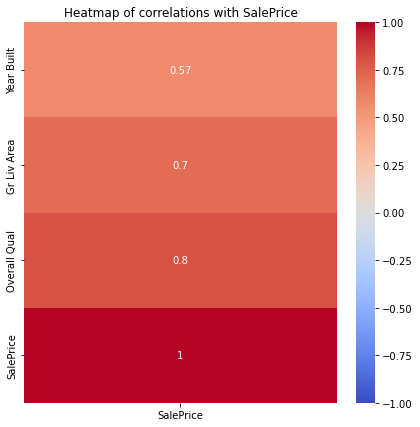

In [1102]:
# Plot heatmap of correlation of numerical features vs target variable SalePrice

# Create figure
plt.figure(figsize=(7,7))

# Create heatmap with correlation data for Sale Price
sns.heatmap(model_df.corr()[["SalePrice"]].sort_values("SalePrice"), 
            annot=True, 
            cmap="coolwarm",
            vmin=-1.0,
            vmax=1.0
           );

# Set title for plot
plt.title("Heatmap of correlations with SalePrice");

##### Overall Qual

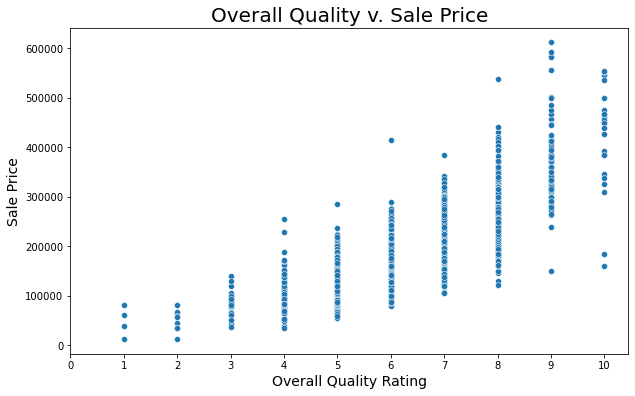

In [1138]:
# Plot scatter plot of Overall Qual feature values

# Create figure
plt.figure(figsize=(10,6))

# Create scatterplot
sns.scatterplot(x = model_df["Overall Qual"], y = model_df["SalePrice"])

# Set labels for axes and title
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("Overall Quality Rating", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)
plt.title("Overall Quality v. Sale Price", fontsize=20);

##### Year Built

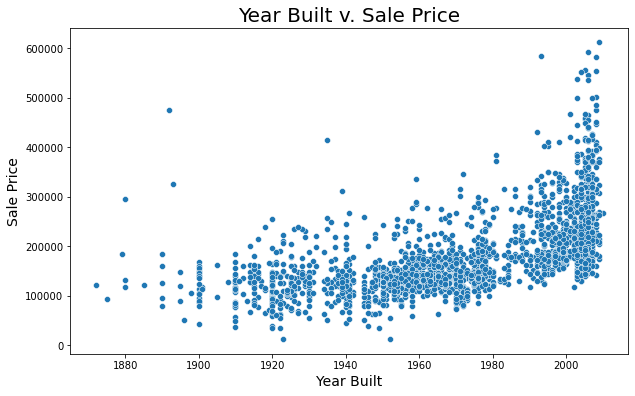

In [1139]:
# Plot scatter plot of Year Built feature values

# Create figure
plt.figure(figsize=(10,6))

# Create scatterplot
sns.scatterplot(x = model_df["Year Built"], y = model_df["SalePrice"])

# Set title
plt.title("Year Built v. Sale Price", fontsize=20);
plt.xlabel("Year Built", fontsize=14)
plt.ylabel("Sale Price", fontsize=14);

##### Exter Qual

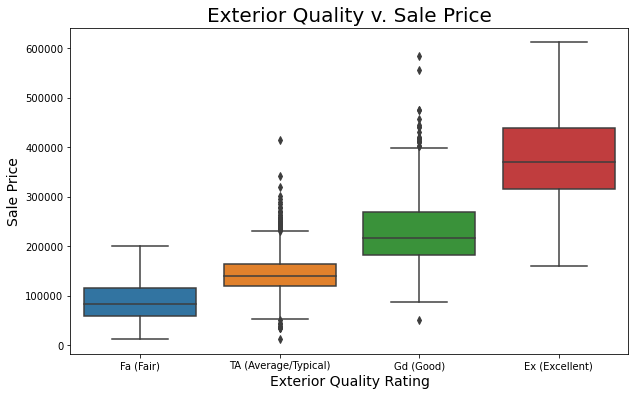

In [1140]:
# Plot boxplot of Exter Qual feature values

# Create figure
plt.figure(figsize=(10,6))

# Create list ordering categorical variables by median SalePrice
exter_qual_order = model_df.groupby("Exter Qual")["SalePrice"].median().sort_values().index

# Create scatterplot
sns.boxplot(x = model_df["Exter Qual"], y = model_df["SalePrice"], order=exter_qual_order)

# Set title and axes labels
plt.xlabel("Exterior Quality Rating", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)
plt.xticks(ticks = [0,1,2,3], labels=["Fa (Fair)", "TA (Average/Typical)", "Gd (Good)", "Ex (Excellent)"])
plt.title("Exterior Quality v. Sale Price", fontsize=20);

Exter Qual is an ordinal variable that has a clear relationship with SalePrice. A Ex (Excellent) rating corresponds with a large sale price, with sale price decreasing as we go down the scale. Because of this, I believe this variable may be better represented as a discrete variable ranging from 0 - 4.

In [1106]:
# Change Exter Qual column in model_df to a 0-4 scale

# Create dict mapping the category values to integer values
quality_scale = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

# Map new values to Exter Qual column
model_df["Exter Qual"] = model_df["Exter Qual"].map(quality_scale)

/var/folders/z5/c4rcrckn44b2pjl471gjcr8c0000gn/T/ipykernel_21120/3208099784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Exter Qual"] = model_df["Exter Qual"].map(quality_scale)


##### Gr Liv Area

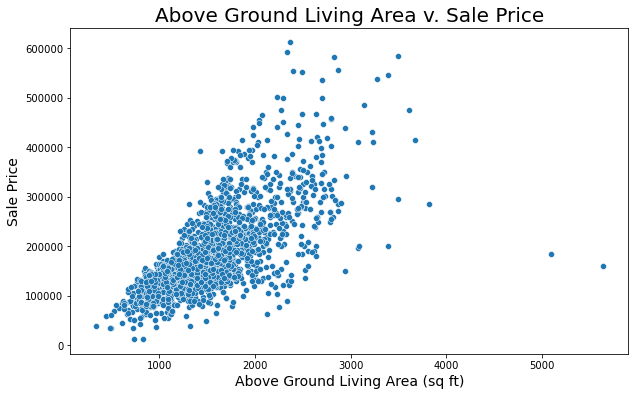

In [1145]:
# Plot scatter plot of Gr Liv Area feature values

# Create figure
plt.figure(figsize=(10,6))

# Create scatterplot
sns.scatterplot(x = model_df["Gr Liv Area"], y = model_df["SalePrice"])

# Set title and axes labels
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Above Ground Living Area (sq ft)", fontsize=14)
plt.title("Above Ground Living Area v. Sale Price", fontsize=20);

##### Kitchen Qual

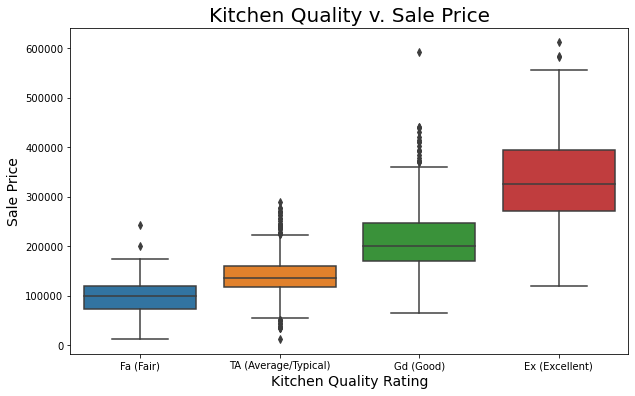

In [1142]:
# Plot boxplot of Kitchen Qual feature values

# Create figure
plt.figure(figsize=(10,6))

# Create list ordering categorical variables by median SalePrice
kitchen_qual_order = model_df.groupby("Kitchen Qual")["SalePrice"].median().sort_values().index

# Create scatterplot
sns.boxplot(x = model_df["Kitchen Qual"], y = model_df["SalePrice"], order=kitchen_qual_order)

# Set title and axes labels
plt.xlabel("Kitchen Quality Rating", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)
plt.xticks(ticks = [0,1,2,3], labels=["Fa (Fair)", "TA (Average/Typical)", "Gd (Good)", "Ex (Excellent)"])
plt.title("Kitchen Quality v. Sale Price", fontsize=20);

Like, Exter Qual, Kitchen Qual is an ordinal variable that has a clear relationship with SalePrice. A Ex (Excellent) rating corresponds with a large sale price, with sale price decreasing as we go down the scale. Because of this, I believe this variable may be better represented as a discrete variable ranging from 0 - 4.

In [1109]:
# Change Kitchen Qual column in model_df to a 0-4 scale

# Create dict mapping the category values to integer values
quality_scale = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

# Map new values to Exter Qual column
model_df["Kitchen Qual"] = model_df["Kitchen Qual"].map(quality_scale)

/var/folders/z5/c4rcrckn44b2pjl471gjcr8c0000gn/T/ipykernel_21120/3131423544.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Kitchen Qual"] = model_df["Kitchen Qual"].map(quality_scale)


##### Bsmt Qual

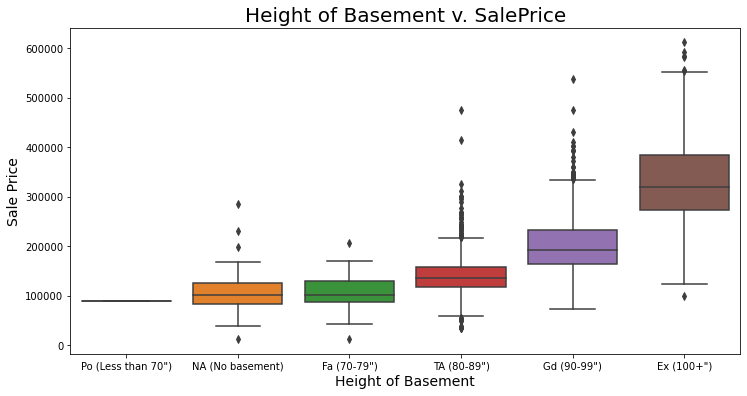

In [1143]:
# Plot boxplot of Bsmt Qual feature values

# Create figure
plt.figure(figsize=(12,6))

# Create list ordering categorical variables by median SalePrice
bsmt_qual_order = model_df.groupby("Bsmt Qual")["SalePrice"].median().sort_values().index

# Create scatterplot
sns.boxplot(x = model_df["Bsmt Qual"], y = model_df["SalePrice"], order=bsmt_qual_order)

# Set title and axes labels
plt.xlabel("Height of Basement", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)
plt.xticks(ticks = [0,1,2,3,4,5], labels=["Po (Less than 70\")", "NA (No basement)", "Fa (70-79\")", "TA (80-89\")", "Gd (90-99\")", "Ex (100+\")"])
plt.title("Height of Basement v. SalePrice", fontsize=20);

Like, Exter Qual and Kitchen Qual, Basement Qual is an ordinal variable that has a clear relationship with SalePrice. A Ex (Excellent) rating corresponds with a large sale price, with sale price decreasing as we go down the scale (except for the ratings of Po, NA and Fa which appear to have very similar SalePrice values). Because of this, I believe this variable may be better represented as a discrete variable ranging from 0 - 5.

In [1111]:
# Change Bsmt Qual column in model_df to a 0-5 scale

# Create dict mapping the category values to integer values
quality_scale = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

# Map new values to Exter Qual column
model_df["Bsmt Qual"] = model_df["Bsmt Qual"].map(quality_scale)

/var/folders/z5/c4rcrckn44b2pjl471gjcr8c0000gn/T/ipykernel_21120/2724552700.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Bsmt Qual"] = model_df["Bsmt Qual"].map(quality_scale)


##### Neighborhood

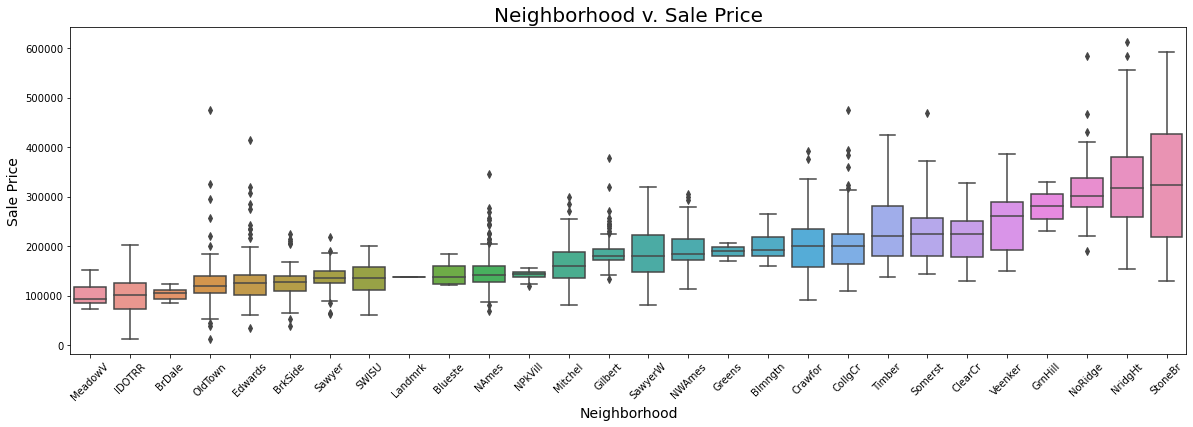

In [1144]:
# Plot boxplot of Neighborhood feature values

# Create figure
plt.figure(figsize=(20,6))

# Create list ordering categorical variables by median SalePrice
neighborhood_order = model_df.groupby("Neighborhood")["SalePrice"].median().sort_values().index

# Create scatterplot
sns.boxplot(x = model_df["Neighborhood"], y = model_df["SalePrice"], order=neighborhood_order)

# Set title and axes labels
plt.xlabel("Neighborhood", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Sale Price", fontsize=14)
#plt.xticks(ticks = [0,1,2,3,4,5], labels=["Po (Less than 70\")", "NA (No basement)", "Fa (70-79\")", "TA (80-89\")", "Gd (90-99\")", "Ex (100+\")"])
plt.title("Neighborhood v. Sale Price", fontsize=20);

### Export of Selected Data
---

In [1091]:
# Write model_df to csv
model_df.to_csv("../datasets/train_cleaned.csv", index=False)